<a href="https://colab.research.google.com/github/Ebadi-Fereshteh/Deep-Learning/blob/main/47_AgePrediction/47_AgePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install wandb

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!ls -a ~/.kaggle
!kaggle datasets download -d jangedoo/utkface-new
!unzip utkface-new.zip

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
# import wandb
# from wandb.keras import WandbCallback
from tensorflow.keras.models import load_model


In [ ]:
# wandb.init(project="Age_Prediction")
# config = wandb.config

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
width = height =224
batch_size = 32

In [7]:
#preprocess Data

images = [] # data
ages = [] # lable

# for image_name in os.listdir("/content/drive/MyDrive/datasets/UTKFace"):
for image_name in os.listdir("/content//UTKFace"):
  age = int(image_name.split('_')[0])
  ages.append(age)

  # image = cv2.imread(f"/content/drive/MyDrive/datasets/UTKFace/{image_name}")
  image = cv2.imread(f"/content/UTKFace/{image_name}")
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (width, height))
  images.append(image)


In [8]:
images = pd.Series(images, name="Images")
ages = pd.Series(ages, name="Ages")

dataframe = pd.concat([images, ages], axis=1)
dataframe.head()
images=[]
ages=[]

35


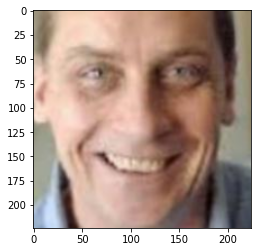

In [ ]:
print(dataframe["Ages"][0])
plt.imshow(dataframe["Images"][0])
plt.show()

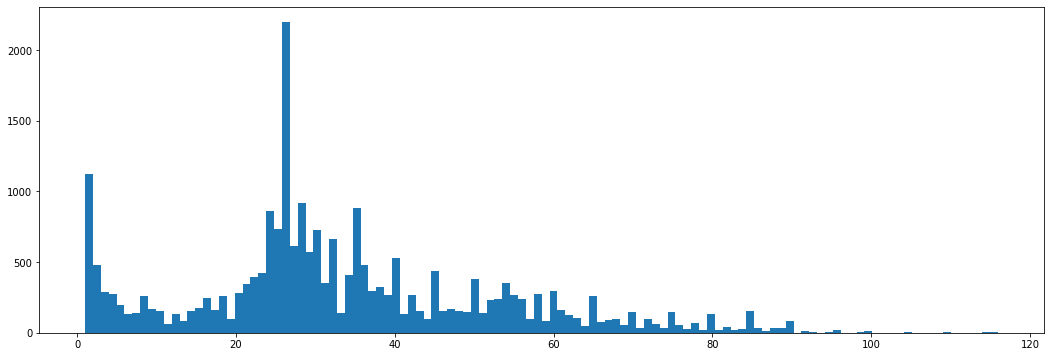

In [ ]:
plt.figure(figsize=(18, 6))
plt.hist(dataframe["Ages"], bins= dataframe["Ages"].max())
plt.show()

In [9]:
# دو سوم بچه های زیر 4 سال رو دور میریزیم
under_4 = dataframe[dataframe["Ages"]<= 4]
under_4_new = under_4.sample(frac = 0.40)

up_4 = dataframe[dataframe["Ages"]>= 4]
dataframe = pd.concat([under_4_new, up_4], axis = 0)

under_4 = []
under_4_new = []
up_4 = []

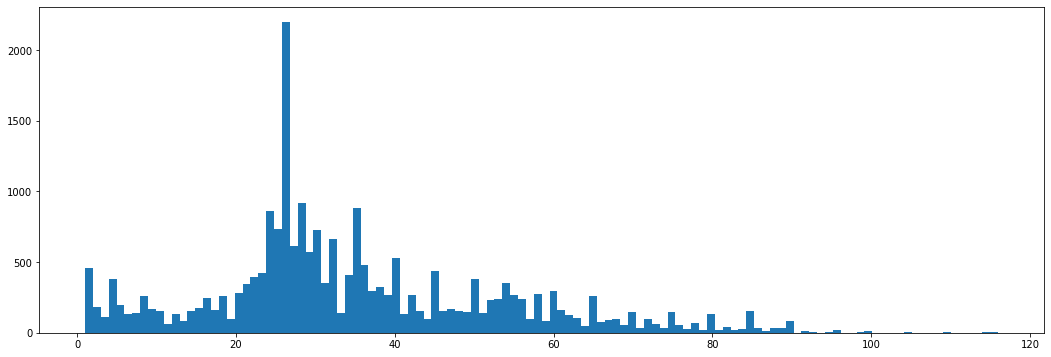

In [ ]:
plt.figure(figsize=(18, 6))
plt.hist(dataframe["Ages"], bins= dataframe["Ages"].max())
plt.show()

In [10]:
dataframe = dataframe[dataframe["Ages"]<80]

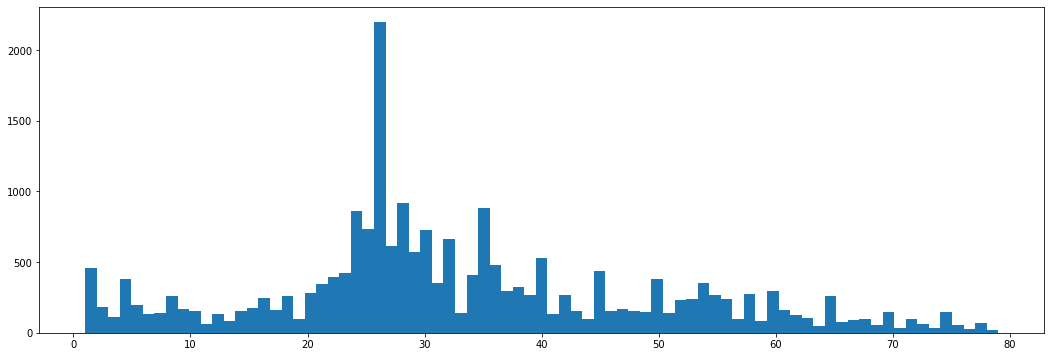

In [ ]:
plt.figure(figsize=(18, 6))
plt.hist(dataframe["Ages"], bins= dataframe["Ages"].max())
plt.show()

In [11]:

age_26 = dataframe[dataframe["Ages"]== 26]
age_26_new = age_26.sample(frac = 0.4)

under_26 = dataframe[dataframe["Ages"]< 26]
up_26 = dataframe[dataframe["Ages"]> 26]

dataframe = pd.concat([under_26,age_26_new, up_26], axis = 0)
under_26=[]
age_26_new=[]
up_26=[]

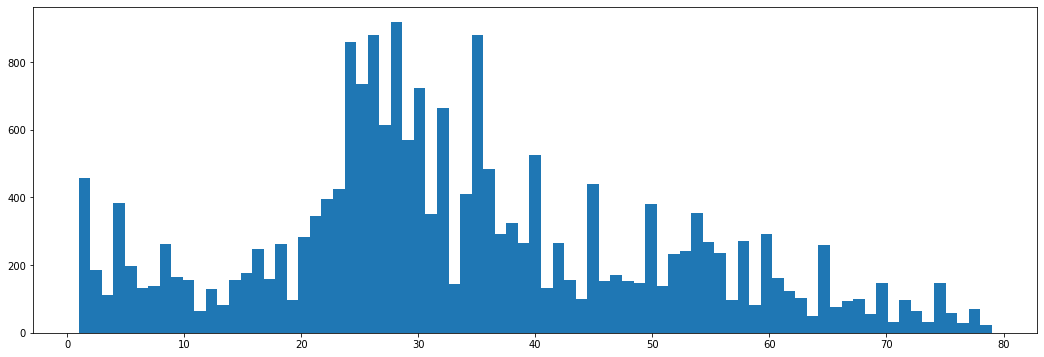

In [ ]:
plt.figure(figsize=(18, 6))
plt.hist(dataframe["Ages"], bins= dataframe["Ages"].max())
plt.show()

In [12]:
df = dataframe.sample(frac = 1)
df_sample = df.sample(frac = 0.5)
# df_sample = df

In [13]:
import gc
del [[df, dataframe]]
gc.collect()
dataframe= pd.DataFrame()
df= pd.DataFrame()

In [14]:
X_data = np.array(df_sample["Images"].values.tolist())

Y_data = np.array(df_sample["Ages"].values.tolist())

In [ ]:
print(X_data.shape)
print(Y_data.shape)

(10345, 224, 224, 3)
(10345,)


In [15]:
del [[df_sample]]
gc.collect()
dataframe= pd.DataFrame()
df_sample= pd.DataFrame()

In [16]:
X_data1, X_next, Y_data1, Y_next = train_test_split(X_data, Y_data, test_size= 0.7, shuffle=True)
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X_data1, Y_data1, test_size= 0.2, shuffle=True)
# print(X_train1.shape)
# print(X_next.shape)
# print(Y_train1.shape)
# print(Y_next.shape)
X_data2, X_next2, Y_data2, Y_next2 = train_test_split(X_next, Y_next, test_size= 0.5, shuffle=True)
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_data2, Y_data2, test_size= 0.2, shuffle=True)
# print(X_train2.shape)
# print(X_next2.shape)
# print(Y_train2.shape)
# print(Y_next2.shape)
X_train3, X_val3, Y_train3, Y_val3 = train_test_split(X_next2, Y_next2, test_size= 0.2, shuffle=True)
# print(X_train3.shape)
# print(X_next2.shape)
# print(Y_train3.shape)
# print(Y_next2.shape)
X_data = Y_data = X_next = Y_next = X_next2 = Y_next2 = []

In [17]:
Y_train1= Y_train1.reshape(Y_train1.size, 1)
Y_val1= Y_val1.reshape(Y_val1.size, 1)
Y_train2= Y_train2.reshape(Y_train2.size, 1)
Y_val2= Y_val2.reshape(Y_val2.size, 1)
Y_train3= Y_train3.reshape(Y_train3.size, 1)
Y_val3= Y_val3.reshape(Y_val3.size, 1)

In [ ]:
# from tensorflow import keras
# class CustomCallback(keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs=None):
#         print("End epoch {} of training;".format(epoch))
#         ep = "epoch_{}".format(epoch)
#         dir = "/content/drive/MyDrive/models/AgePrediction/AgePrediction"
#         name = "{}_{}.h5".format(dir, ep)
#         print(name)
#         model.save(name)
  # def on_epoch_end(self, epoch, logs=None, count=None):
  #       print("End epoch {} of training;".format(epoch))
  #       ct = "c_{}".format(self.count)
  #       ep = "epoch_{}".format(self.epoch)
  #       dir = "/content/drive/MyDrive/models/AgePrediction/AgePrediction"
  #       name = "{}_{}_{}.h5".format(dir, ep, ct)
  #       print(name)
  #       model.save(name)

In [18]:
idg = ImageDataGenerator(rescale= 1./255,
                          horizontal_flip = True,
                          brightness_range=(0.8, 1.2)
                        )

train_1 = idg.flow(X_train1, Y_train1, batch_size= batch_size)
# del [[X_train,Y_train]]
# gc.collect()
# X_train= []
# Y_train= []
val_1 =  idg.flow(X_val1, Y_val1, batch_size = batch_size)
# del [[X_val,Y_val]]
# gc.collect()
# X_val= []
# Y_val= []


In [19]:
idg = ImageDataGenerator(rescale= 1./255,
                          horizontal_flip = True,
                          brightness_range=(0.8, 1.2)
                        )

train_2 = idg.flow(X_train2, Y_train2, batch_size= batch_size)
# del [[X_train,Y_train]]
# gc.collect()
# X_train= []
# Y_train= []
val_2 =  idg.flow(X_val2, Y_val2, batch_size = batch_size)
# del [[X_val,Y_val]]
# gc.collect()
# X_val= []
# Y_val= []


In [20]:
idg = ImageDataGenerator(rescale= 1./255,
                          horizontal_flip = True,
                          brightness_range=(0.8, 1.2)
                        )

train_3 = idg.flow(X_train3, Y_train3, batch_size= batch_size)
# del [[X_train,Y_train]]
# gc.collect()
# X_train= []
# Y_train= []
val_3 =  idg.flow(X_val3, Y_val3, batch_size = batch_size)
# del [[X_val,Y_val]]
# gc.collect()
# X_val= []
# Y_val= []


In [21]:
del [[X_train1, X_train2, X_train3, Y_train1, Y_train2, Y_train3]]
gc.collect()
X_train1= X_train2= X_train3= Y_train1= Y_train2= Y_train3= []
del [[X_val1, X_val2, X_val3, Y_val1, Y_val2, Y_val3]]
gc.collect()
X_val1= X_val2= X_val3= Y_val1= Y_val2= Y_val3= []

In [ ]:
base_model = tf.keras.applications.ResNet50V2(
    input_shape = (width, height, 3),
    weights = "imagenet",
    include_top = False,
    pooling = "avg"
)

In [ ]:
for layer in base_model.layers[:-4]:
  layer.trainable = False

In [ ]:
model = tf.keras.Sequential([
      base_model,
      Dropout(0.5),
      Dense(32),
      Dense(1, activation="relu")
])

In [ ]:
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.mse)

# ResnetV2

In [ ]:
model = load_model('/content/drive/MyDrive/models/AgePrediction/AgePrediction_Resnet_19.h5')

In [ ]:

for i in range(1,10):
  count = 0
  model_history = model.fit(
      train_1,validation_data= val_1 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_Resnet2_{}.h5'.format(count))
  count = 10
  model_history2 = model.fit(
      train_2,validation_data= val_2 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i   
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_Resnet2_{}.h5'.format(count))
  count= 20
  model_history3 = model.fit(
      train_3,validation_data= val_3 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_Resnet2_{}.h5'.format(count))

91/91 [==============================] - 22s 237ms/step - loss: 132.6394 - val_loss: 128.7649


# Mobilenet

In [22]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape = (width, height, 3),
    weights = "imagenet",
    include_top = False,
    pooling = "avg"
)

9420800/9406464 [==============================] - 0s 0us/step


In [23]:
for layer in base_model.layers[:-4]:
  layer.trainable = False

In [24]:
model = tf.keras.Sequential([
      base_model,
      Dropout(0.5),
      Dense(32),
      Dense(1, activation="relu")
])

In [25]:
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.mse)

In [26]:
model = load_model('/content/drive/MyDrive/models/AgePrediction/AgePrediction_mobilenet_19.h5')

In [27]:
for i in range(1,10):
  count = 0
  model_history = model.fit(
      train_1,validation_data= val_1 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_mobilenet2_{}.h5'.format(count))
  count = 10
  model_history2 = model.fit(
      train_2,validation_data= val_2 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i   
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_mobilenet2_{}.h5'.format(count))
  count= 20
  model_history3 = model.fit(
      train_3,validation_data= val_3 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_mobilenet2_{}.h5'.format(count))

91/91 [==============================] - 13s 146ms/step - loss: 77.9476 - val_loss: 158.4354


In [28]:
model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_mobilenet2V2.h5')

#Xception

In [ ]:
base_model = tf.keras.applications.Xception(
    input_shape = (width, height, 3),
    weights = "imagenet",
    include_top = False,
    pooling = "avg"
)

In [30]:
for layer in base_model.layers[:-4]:
  layer.trainable = False

In [31]:
model = tf.keras.Sequential([
      base_model,
      Dropout(0.5),
      Dense(32),
      Dense(1, activation="relu")
])

In [32]:
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.mse)

In [33]:
model = load_model('/content/drive/MyDrive/models/AgePrediction/AgePrediction_xception_19.h5')

In [34]:
for i in range(1,10):
  count = 0
  model_history = model.fit(
      train_1,validation_data= val_1 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_xception2_{}.h5'.format(count))
  count = 10
  model_history2 = model.fit(
      train_2,validation_data= val_2 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i   
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_xception2_{}.h5'.format(count))
  count= 20
  model_history3 = model.fit(
      train_3,validation_data= val_3 ,epochs= 1, # callbacks=[WandbCallback()]
      )
  count = count + i
  model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_xception2_{}.h5'.format(count))

91/91 [==============================] - 36s 400ms/step - loss: 56.0108 - val_loss: 106.7137


In [35]:
model.save('/content/drive/MyDrive/models/AgePrediction/AgePrediction_xception2.h5')

In [45]:
image=cv2.imread('/content/03.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(width,height))
image=image/255.0
image=image.reshape(1, width, height, 3)

model = load_model('/content/drive/MyDrive/models/AgePrediction/AgePrediction_Resnet2_19.h5')
result= model.predict(image)
print(result)
model = load_model('/content/drive/MyDrive/models/AgePrediction/AgePrediction_mobilenet2V2.h5')
result=model.predict(image)
print(result)
model = load_model('/content/drive/MyDrive/models/AgePrediction/AgePrediction_xception2_19.h5')
result=model.predict(image)
print(result)

[[46.437965]]
[[40.915874]]
[[33.48198]]
